## Exercise 2

Machine Learning pipeline

1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

2. Load the dataset


In [13]:
#put your answer here
df = pd.read_csv('iris.csv')
df.drop(columns="Id", inplace=True)
df.tail()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

3. Visualize the dataset

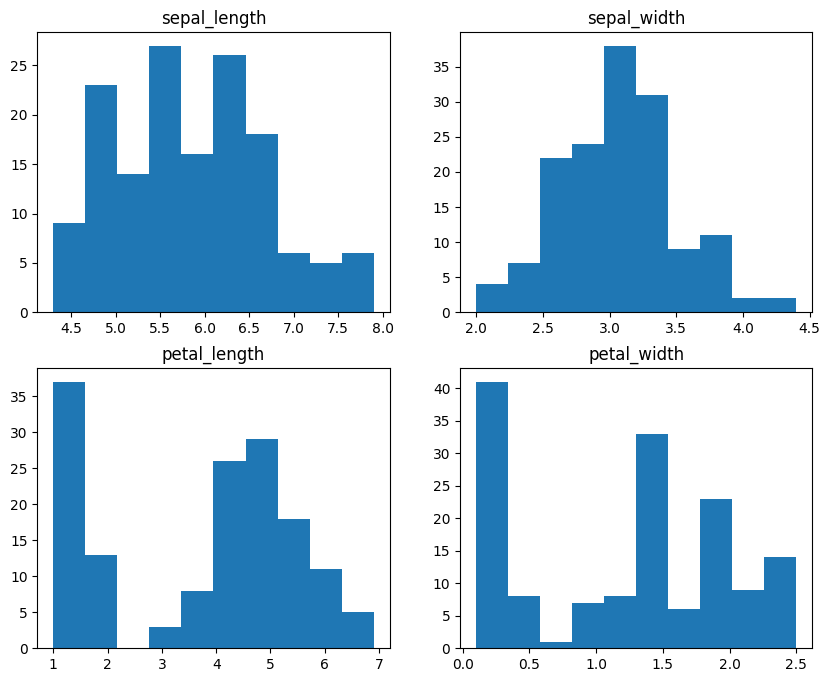

In [32]:
# put your answer here
fig, ax = plt.subplots(2,2, figsize=(10,8))

ax[0, 0].hist(df["SepalLengthCm"])
ax[0, 1].hist(df["SepalWidthCm"])
ax[1, 0].hist(df["PetalLengthCm"])
ax[1, 1].hist(df["PetalWidthCm"])

ax[0, 0].set_title("sepal_length")
ax[0, 1].set_title("sepal_width")
ax[1, 0].set_title("petal_length")
ax[1, 1].set_title("petal_width")

plt.show()

In [47]:
colors = {'Iris-setosa': 'red',
          'Iris-virginica': 'blue',
          'Iris-versicolor': 'green'}

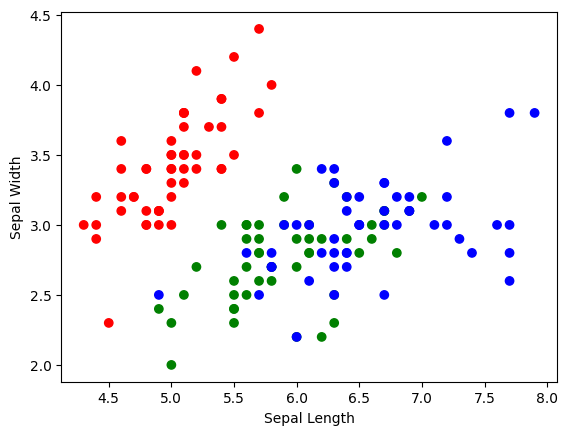

In [48]:
plt.scatter(df["SepalLengthCm"], df["SepalWidthCm"], c=df['Species'].map(colors))
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

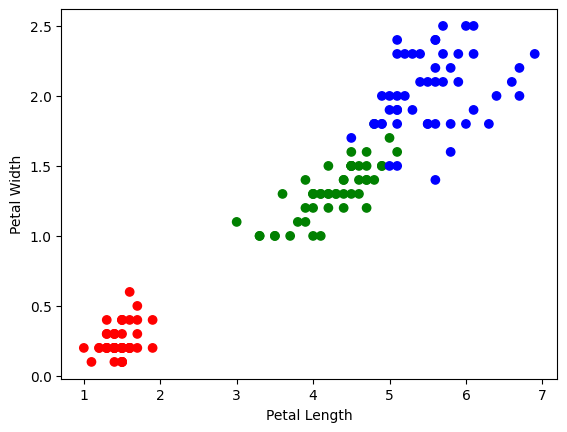

In [49]:
plt.scatter(df["PetalLengthCm"], df["PetalWidthCm"], c=df['Species'].map(colors))
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

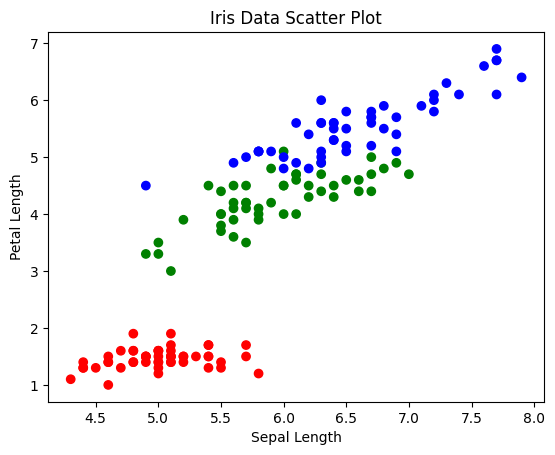

In [50]:
plt.scatter(df["SepalLengthCm"], df["PetalLengthCm"],
            c=df['Species'].map(colors))
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Iris Data Scatter Plot")
plt.show()

4. Split the dataset into a training set and a testing set

In [120]:
# put your answer here
X = df.drop(columns=['Species']).values
y = df['Species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


5. Train the model

In [122]:
# put your answer here
score = []
k_range = list(range(1, 30))
best_k = 0
best_score = float('-inf')

for k in k_range:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train, y_train) # Train Model

  y_pred = knn_model.predict(X_test) # Predict labels for test set
  if knn_model.score(X_test, y_test) > best_score:
    best_score = knn_model.score(X_test, y_test)
    best_k = k
    print(f"Best model - k = {k}, Accuracy: {best_score}")

  score.append(knn_model.score(X_test, y_test))

Best model - k = 1, Accuracy: 0.9
Best model - k = 3, Accuracy: 0.9333333333333333
Best model - k = 6, Accuracy: 0.9666666666666667
Best model - k = 8, Accuracy: 1.0


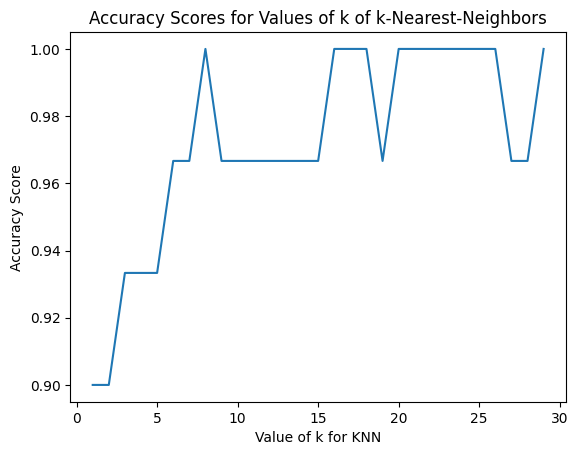

In [123]:
plt.plot(range(1,30), score)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

6. Test the model

In [127]:
# put your answer here
knn_model = KNeighborsClassifier(n_neighbors = best_k)

knn_model.fit(X_train, y_train) # Train Model
y_pred = knn_model.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00         8\nIris-versicolor       1.00      1.00      1.00        11\n Iris-virginica       1.00      1.00      1.00        11\n\n       accuracy                           1.00        30\n      macro avg       1.00      1.00      1.00        30\n   weighted avg       1.00      1.00      1.00        30\n'

In [128]:
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [132]:
knn_model.predict([[4, 3, 2, 1.2]])

array(['Iris-setosa'], dtype=object)